In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
ruta = '../data/calidad_aire_clean_outliers.csv'
df = pd.read_csv(ruta, delimiter=',')
df.head(2)

,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,14.0,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,12.0,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [3]:
# df.describe()

In [4]:
# sns.scatterplot(data=df, x='TEMPERATURA', y='ICA');

In [5]:
# X = df[['TEMPERATURA']]
# y = df[['ICA']]

# model = LinearRegression()
# model.fit(X,y)
# y_pred = model.predict(X)

In [6]:
# sns.scatterplot(data=df, x='TEMPERATURA', y=df['ICA'])
# sns.lineplot(x=df['TEMPERATURA'], y=y_pred.flatten(), color='r', label='Predicciones')

In [7]:
X = df[['ICA']]
y = df[['TEMPERATURA']]

# 80% Entrenamiento: X_train, y_train
# 20% Test: X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Entrenammiento {X_train.shape} {y_train.shape}')
print(f'Test {X_test.shape} {y_test.shape}')

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)



Entrenammiento (24688, 1) (24688, 1)
Test (6172, 1) (6172, 1)


In [ ]:
# Posible cantidad de margen de salario que el modelo se equivoca
# Cuanto menor sea el error, mejor es la predicción
mae = mean_absolute_error(y_test, y_pred)

In [9]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
#rmse = np.sqrt(mse)

print(f'mse: {mse}')
print(f'rmse {rmse}')

mse: 57.644075430884165
rmse 7.592369553102915


In [ ]:
# Transformar la entrada X agregando nuevas características que son el cuadrado de las variables de entredaa orignales
repocessor = PolynomialFeatures(degree=2)
X_g2 = repocessor.fit_transform(X)
X_g2

In [12]:
model = LinearRegression()
model.fit(X_g2,y)
y_pred = model.predict(X_g2)
y_pred

array([[18.30159791],
       [18.3804793 ],
       [18.78571053],
       ...,
       [16.8195861 ],
       [15.24290946],
       [16.15242214]])

<Axes: xlabel='ICA', ylabel='TEMPERATURA'>

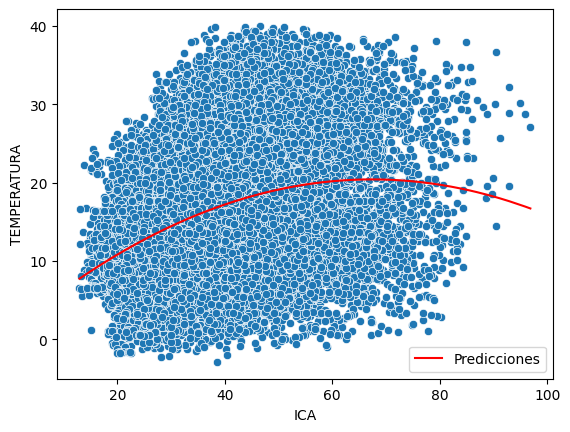

In [13]:
sns.scatterplot(data=df, x='ICA', y=df['TEMPERATURA'])
sns.lineplot(x=df['ICA'], y=y_pred.flatten(), color='r', label='Predicciones')

In [11]:
# # Test vs prediccion
# sns.scatterplot(x=X_test['ICA'], y=y_test) # test
# sns.lineplot(x=X_test['ICA'], y=y_pred, c='r') # predicciones